### name: Chunsheng Fang
### github name: chunshengFang
### usc id :5043794779

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
data = pd.read_excel('./data/CCPP/Folds5x2_pp.xlsx')
#data=pd.read_csv('./data/CCPP/Folds5x2_pp.csv')
#I have translated the excel file to csv file

## B(i). rows and columns of data and their meanings

In [37]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [38]:
print("Number of rows in this Sheet: ",data.shape[0],"\n")
print("Number of columns in this Sheet: ",data.shape[1],"\n")
data.head()

Number of rows in this Sheet:  9568 

Number of columns in this Sheet:  5 



,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


There are 9568 rows in the dataset and 5 columns. Each row represent a sample point. 

There four features of columns:
AT:hourly average ambient variables Temperature
V :Exhaust Vacuum
AP:Ambient Pressure
RH:Relative Humidity
PE:hourly electrical energy output

## B(ii). pairwise scatterplots of all variables

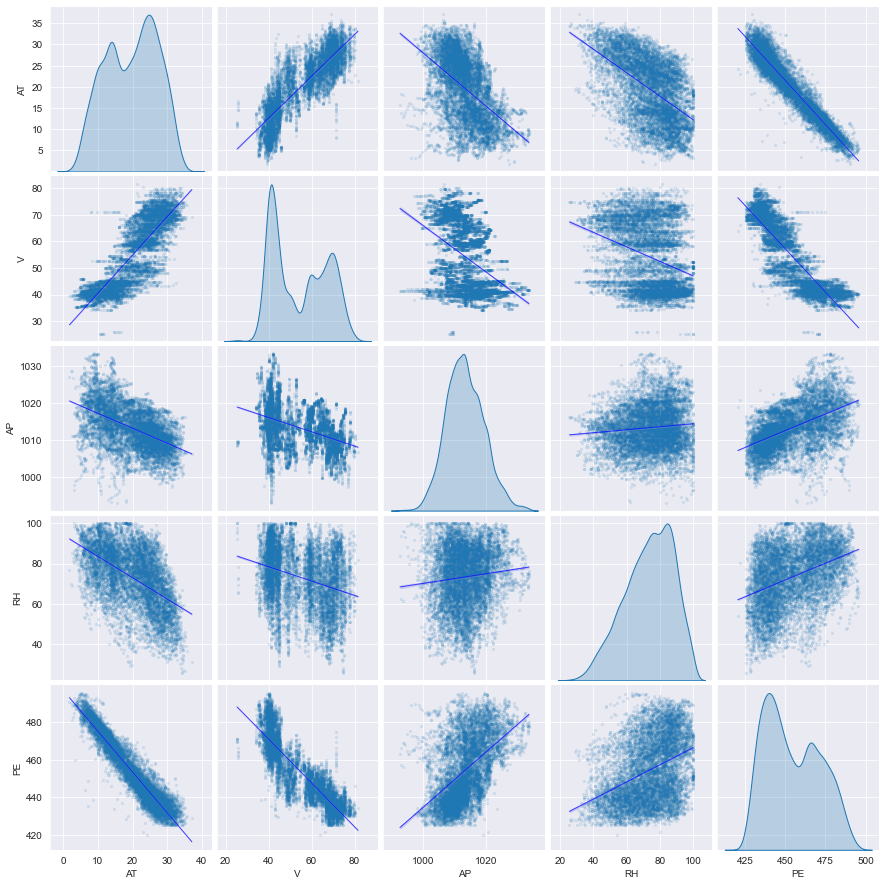

In [39]:
sns.set_style("darkgrid")
g = sns.pairplot(data, diag_kind="kde", kind="reg", 
                         palette=sns.color_palette("Paired"),
                        plot_kws={'line_kws':{'color': 'blue', "linewidth": 1, 'alpha': 0.7},
                                   'scatter_kws': {'s': 5, 'alpha': 0.1}})

plt.show()



In [40]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## B(iii).  data summary in the table

In [41]:
feature = [col for col in data.columns]
mean = [np.around(data[col].mean(), 2) for col in data.columns]
median = [np.around(data[col].median(), 2) for col in data.columns]
rang= [np.around(data[col].max() - data[col].min(), 2) for col in data.columns]
firstQ = [np.around(data[col].quantile(0.25), 2) for col in data.columns]
thirdQ = [np.around(data[col].quantile(0.75), 2) for col in data.columns]
Interquartile_R = [np.around(y - x, 2) for x, y in zip(firstQ, thirdQ)]

data_summary = {
    "feature" : feature,
    "mean" : mean,
    "median" : median,
    "range" : rang,
    "first quartile" : firstQ,
    "third quartile" : thirdQ,
    "interquartile range" : Interquartile_R
}

data_summary = pd.DataFrame(data_summary)
data_summary.set_index("feature")
data_summary

,feature,mean,median,range,first quartile,third quartile,interquartile range
0,AT,19.65,20.34,35.30,13.51,25.72,12.21
1,V,54.31,52.08,56.20,41.74,66.54,24.80
2,AP,1013.26,1012.94,40.41,1009.10,1017.26,8.16
3,RH,73.31,74.97,74.60,63.33,84.83,21.50
4,PE,454.37,451.55,75.50,439.75,468.43,28.68


# C. for each predictor, fit a simple linear regression model to predict the response.

In [42]:
trainX_AT = data['AT'].to_numpy()
trainX_V = data['V'].to_numpy()
trainX_AP = data['AP'].to_numpy()
trainX_RH = data['RH'].to_numpy()
trainY_PE = data['PE'].to_numpy()


In [43]:
P_THRESH = 0.05

simple_regression_coefs = {}

#perform simple linear regression for each predictor
def simpleLinearRegression(trainX_feature, trainY, feature_name):
    #add constant here to enable bias, use this to predict as well
    trainX = sm.add_constant(trainX_feature, prepend=False)
    
    #model and fit the data
    olsmod = sm.OLS(trainY, trainX)
    olsres = olsmod.fit()
    predictions=olsres.predict(trainX)
    # record the codffieients for the model and output 
    simple_regression_coefs[feature_name] = olsres.params
    print(olsres.summary())
    
    # find out the outliers if exist
    outliers = olsres.outlier_test()
    outliers_idx = np.where(outliers[:, 2] < P_THRESH)
    
    # plot regression graph
    fig, axes = plt.subplots(figsize=(12, 7))
    with plt.style.context('ggplot'):
        axes.scatter(trainX_feature, trainY, alpha=0.3, label="Data point")
        axes.scatter(trainX_feature[outliers_idx], trainY[outliers_idx], marker="+", label="Outliers")
        axes.plot(trainX_feature, olsres.predict(trainX), "tab:red", alpha=0.8, label="Rgression Result")
    axes.set_title("Simple Linear Regression for {}".format(feature_name))
    axes.set_xlabel(feature_name)
    axes.set_ylabel("PE")
    axes.legend()
    plt.show()
    
    # use the table to show output outliers
    outliers_tuple = np.vstack((trainX_feature[outliers_idx], trainY[outliers_idx]))
    return pd.DataFrame(outliers_tuple.T, columns=[feature_name, "PE"])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:15   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1713      0.007   -291.715      0.0

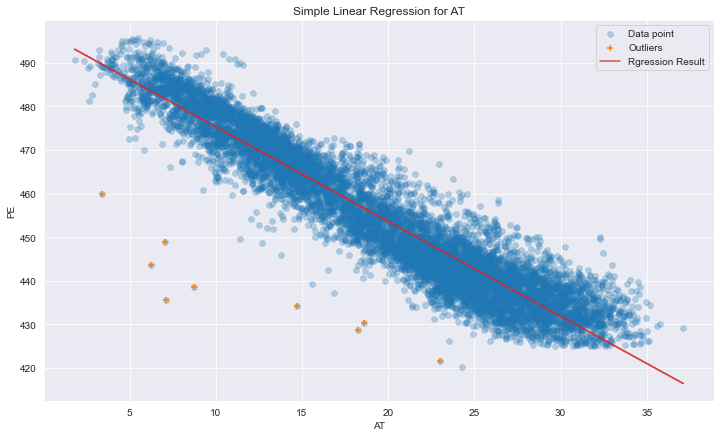

,AT,PE
0,8.74,438.63
1,6.22,443.73
2,14.69,434.12
3,23.00,421.57
4,18.60,430.38
5,7.06,448.97
6,7.14,435.58
7,18.26,428.67
8,3.40,459.86


In [44]:
outliers = simpleLinearRegression(trainX_AT, trainY_PE, "AT")
outliers

9 outliers

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:24   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1681      0.007   -172.402      0.0

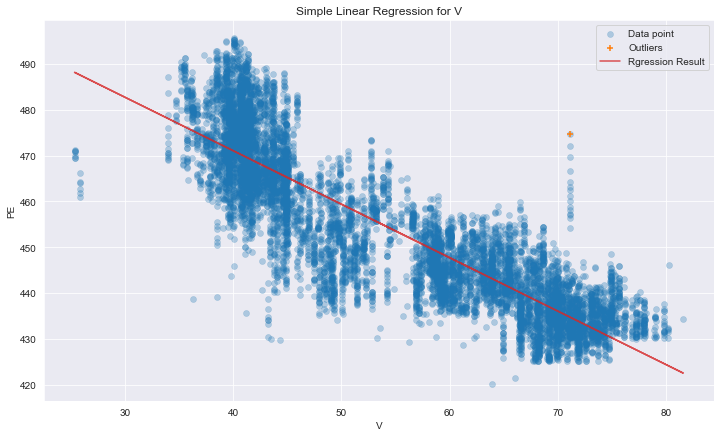

,V,PE
0,71.14,474.66


In [45]:
outliers = simpleLinearRegression(trainX_V, trainY_PE, "V")
outliers

One outlier

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:33   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4899      0.025     59.296      0.0

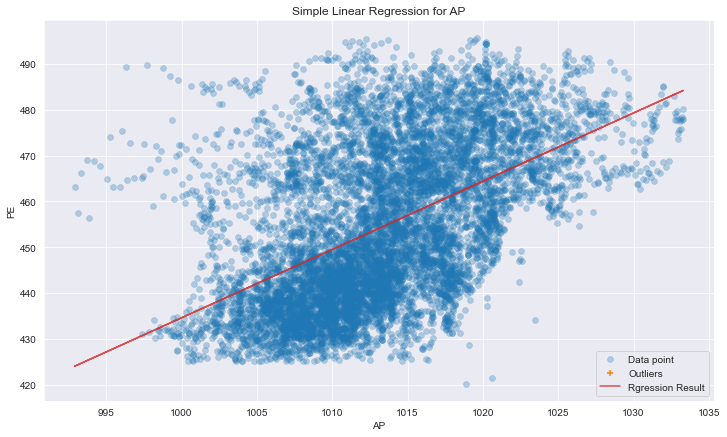

,AP,PE


In [46]:
outliers = simpleLinearRegression(trainX_AP, trainY_PE, "AP")
outliers

No outlier

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:41   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4557      0.011     41.399      0.0

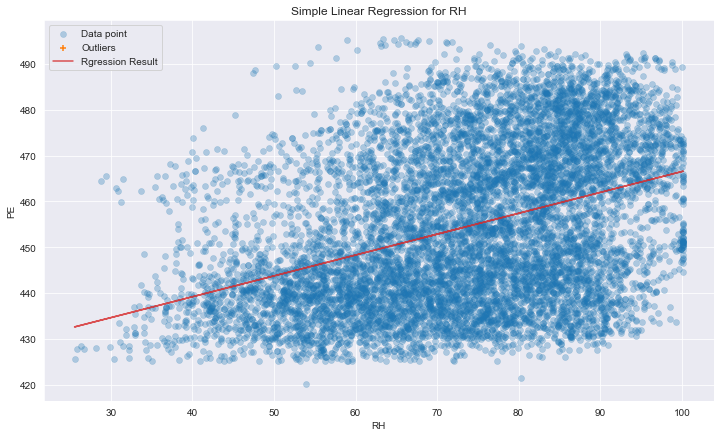

,RH,PE


In [47]:
outliers = simpleLinearRegression(trainX_RH, trainY_PE, "RH")
outliers

No outlier detected!

# D. Fit multiple regression model

In [48]:
trainX_all = data.iloc[:, :-1].to_numpy()
trainX_all = sm.add_constant(trainX_all, prepend=False)

olsmod = sm.OLS(trainY_PE, trainX_all)
olsres = olsmod.fit()

print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:50   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9775      0.015   -129.342      0.0

Warnings:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

All Predictors in this dataset are statistically significant so we can safely reject the null Hypothesis


# E. Compare coefficients

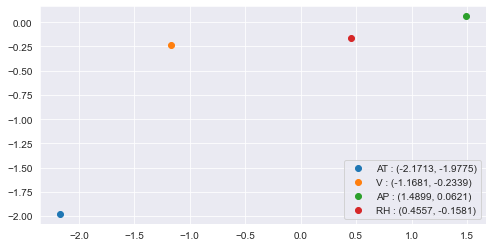

In [49]:
fig, axes = plt.subplots(figsize=(8, 4))
for i, feature in enumerate(data.columns[:-1]):
    text = "{} : ({}, {})".format(feature, 
                                        np.around(simple_regression_coefs[feature][0], 4), 
                                        np.around(olsres.params[i], 4))
    axes.scatter(simple_regression_coefs[feature][0], olsres.params[i], label=text)
axes.legend()
plt.show()

# F. Any nonlinear association between any predictor and the response?

In [50]:
from sklearn.preprocessing import PolynomialFeatures

def usePolyFeature(trainX_feature, trainY, feature_name):
    # generate poly data for the given feature
    poly = PolynomialFeatures(3)
    trainX_poly = poly.fit_transform(np.expand_dims(trainX_feature, axis=1)) 
    
    # build model and fit the data
    olsmod = sm.OLS(trainY, trainX_poly)
    olsres = olsmod.fit()
    
    # output the summary of model
    print(olsres.summary())
    
    return pd.DataFrame(np.expand_dims(olsres.params, axis=0), columns=["beta_0", "beta_1", "beta_2", "beta_3"])
                                                                        
    

In [51]:
coefs = usePolyFeature(trainX_AT, trainY_PE, "AT")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:50   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [52]:
coefs = usePolyFeature(trainX_V, trainY_PE, "V")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:50   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [53]:
coefs = usePolyFeature(trainX_AP, trainY_PE, "AP")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [54]:

coefs = usePolyFeature(trainX_RH, trainY_PE, "RH")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

V^2, V^3 are not statistically Significant because p values are greater than 0.05

Yes there are evidence of non linear association predictor and response

# G. Is there evidence of association of interactions of predictors with the response?

In [55]:
piarwise_inter = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
olsmod = smf.ols(formula = piarwise_inter, data = data)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

AT:V , AT:RH , and V:AP are the statistically Significant interaction terms or Pairs

# H. Improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response

In [56]:
import random
from sklearn.metrics import mean_squared_error

# generate indecies in random order to shuffle data
idx = [x for x in range(0,9568)]
random.seed(9568)
random.shuffle(idx)

# split the dataset: 70% train, 30% test
train_size = round(len(data) * 0.7)
train_data_70 = data.iloc[idx[:train_size], :]
test_X_30 = data.iloc[idx[train_size:], :-1]
test_Y_30 = data.iloc[idx[train_size:], -1]

# declare a dict to record MSE for different models
mse_dict = {}


In [57]:
formula = 'PE ~ AT + V + AP + RH'
olsres = smf.ols(formula, train_data_70).fit()
print(olsres.summary())

predict_trainY = olsres.predict(train_data_70.iloc[:, :-1])
predict_testY = olsres.predict(test_X_30)

train_mse = mean_squared_error(train_data_70.iloc[:, -1], predict_trainY)
test_mse = mean_squared_error(test_Y_30, predict_testY)

mse_dict["all_predictor_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(formula, np.around(train_mse, 2), np.around(test_mse, 2)))                           

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.168e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -19623.
No. Observations:                6698   AIC:                         3.926e+04
Df Residuals:                    6693   BIC:                         3.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.0206     11.661     38.250      0.0

In [58]:
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
olsres = smf.ols(formula, train_data_70).fit()
print(olsres.summary())

predict_trainy = olsres.predict(train_data_70.iloc[:, :-1])
predict_testy = olsres.predict(test_X_30)

train_mse = mean_squared_error(train_data_70.iloc[:, -1], predict_trainy)
test_mse = mean_squared_error(test_Y_30, predict_testy)

mse_dict["all_inter_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(formula, np.around(train_mse, 2), np.around(test_mse, 2)))
                                                 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7173.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -19160.
No. Observations:                6698   AIC:                         3.835e+04
Df Residuals:                    6683   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6396.5247   1454.668     

In [59]:
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH'
olsres = smf.ols(formula, train_data_70).fit()
print(olsres.summary())

predict_trainy = olsres.predict(train_data_70.iloc[:, :-1])
predict_testy = olsres.predict(test_X_30)

train_mse = mean_squared_error(train_data_70.iloc[:, -1], predict_trainy)
test_mse = mean_squared_error(test_Y_30, predict_testy)

#mse_dict["manual_tail_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(formula, np.around(train_mse, 2), np.around(test_mse, 2)))
                        

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -19170.
No. Observations:                6698   AIC:                         3.836e+04
Df Residuals:                    6687   BIC:                         3.844e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.025e+04   1096.773     

In [60]:
def backwardSelection(train_data, formula, p_thresh):
    import re
    while True:
        olsres = smf.ols(formula, train_data).fit()
        response = re.split(" ~ ", formula)[0]
        # observe the p values excluding intersection
        p_values = olsres.pvalues[1:]
        max_p = p_values.max()
        if (max_p >= p_thresh):
            print("Remove " + p_values[p_values == max_p].axes[0].tolist()[0])
            new_terms = p_values[p_values != max_p].axes[0].tolist()
            formula = response + " ~ " + " + ".join(new_terms)
        else:
            return olsres, formula

In [61]:
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
olsres, tailed_formula = backwardSelection(train_data_70, formula, 0.05)
print(olsres.summary())

predict_trainy = olsres.predict(train_data_70.iloc[:, :-1])
predict_testy = olsres.predict(test_X_30)

train_mse = mean_squared_error(train_data_70.iloc[:, -1], predict_trainy)
test_mse = mean_squared_error(test_Y_30, predict_testy)

mse_dict["improved_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(tailed_formula, np.around(train_mse, 2), np.around(test_mse, 2)))

Remove V:RH
Remove V:AP
Remove np.power(V, 2)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9130.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:51   Log-Likelihood:                -19161.
No. Observations:                6698   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

From all-predictor model and the one with nonlinear terms, we can see a significant imporvement int test MSE from 21.63 to 18.69.

# I. KNN Regression:

In [62]:
from sklearn.neighbors import KNeighborsRegressor

# use raw data
train_X_70 = train_data_70.iloc[:, :-1]
train_Y_70 = train_data_70.iloc[:, -1]

k_reverse = []
train_error = []
test_error = []
min_idx = 0

for k in range(1, 101):
    # construct and fit the knn regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_X_70, train_Y_70)
    k_reverse.append(1 / k)
    # predict train set and calculate mse
    train_predict = knn.predict(train_X_70)
    tmp_mse = mean_squared_error(train_Y_70, train_predict)
    train_error.append(tmp_mse)
    # predict test set and calculate mse
    test_predict = knn.predict(test_X_30)
    tmp_mse = mean_squared_error(test_Y_30, test_predict)
    test_error.append(tmp_mse)
    # update the idx of minimum
    if tmp_mse < test_error[min_idx]:
        min_idx = k - 1;

mse_dict["raw_KNN"] = [train_error[min_idx], test_error[min_idx]]
print("The best performance of KNN regressor with normalized data is:")
print("-" * 50)
print("k : {} \nTrain MSE: {} \nTest MSE : {}".format(round(1 / k_reverse[min_idx]), 
                                                      train_error[min_idx], 
                                                      test_error[min_idx]))

The best performance of KNN regressor with normalized data is:
--------------------------------------------------
k : 4 
Train MSE: 9.42197962171544 
Test MSE : 16.046083643292683


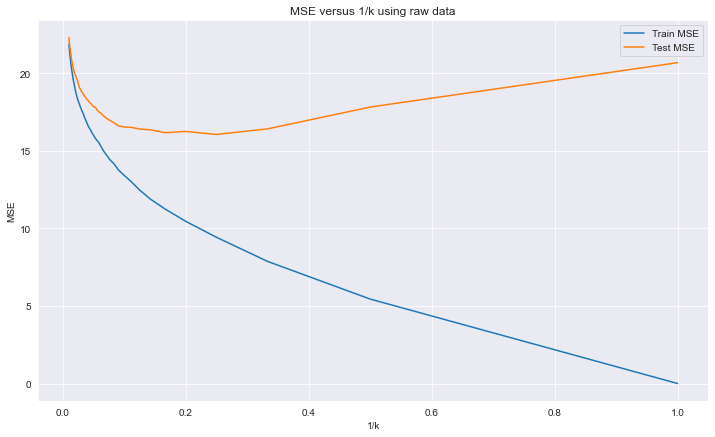

In [63]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(k_reverse, train_error, label="Train MSE")
axes.plot(k_reverse, test_error, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE versus 1/k using raw data")
plt.show()

In [64]:
from sklearn.preprocessing import normalize

norm_train_X_70 = normalize(train_X_70)
norm_test_X_30 = normalize(test_X_30)

k_reverse = []
train_error = []
test_error = []
min_idx = 0

for k in range(1, 101):
    # construct and fit the knn regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(norm_train_X_70, train_Y_70)
    k_reverse.append(1 / k)
    # predict train set and calculate mse
    train_predict = knn.predict(norm_train_X_70)
    tmp_mse = mean_squared_error(train_Y_70, train_predict)
    train_error.append(tmp_mse)
    # predict test set and calculate mse
    test_predict = knn.predict(norm_test_X_30)
    tmp_mse = mean_squared_error(test_Y_30, test_predict)
    test_error.append(tmp_mse)
    # update the idx of minimum
    if tmp_mse < test_error[min_idx]:
        min_idx = k - 1;

mse_dict["normalized_KNN"] = [train_error[min_idx], test_error[min_idx]]
print("The best performance of KNN regressor with normalized data is:")
print("-" * 50)
print("k : {} \nTrain MSE: {} \nTest MSE : {}".format(round(1 / k_reverse[min_idx]), 
                                                      train_error[min_idx], 
                                                      test_error[min_idx]))

The best performance of KNN regressor with normalized data is:
--------------------------------------------------
k : 13 
Train MSE: 15.006301375134512 
Test MSE : 17.625370800156702


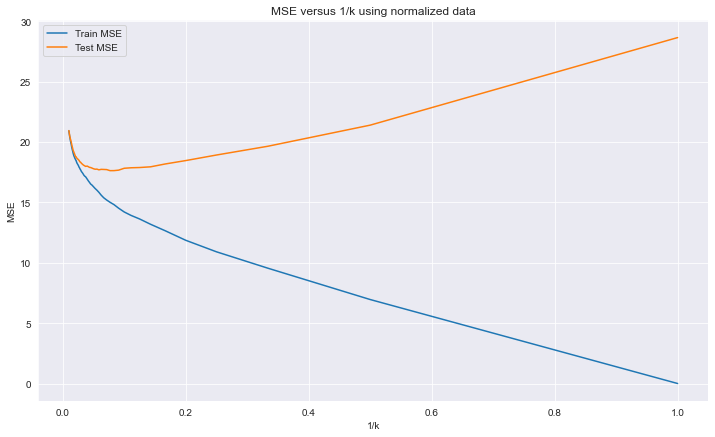

In [65]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(k_reverse, train_error, label="Train MSE")
axes.plot(k_reverse, test_error, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE versus 1/k using normalized data")
plt.show()

In [66]:
# use standardized data

# following standarization is feasible as well
std_train_X_70 = train_X_70.apply(lambda col: (col-col.mean()) / np.std(col), axis = 0)
std_test_X_30 = test_X_30.apply(lambda col: (col-col.mean()) / np.std(col), axis = 0)

k_reverse = []
train_error = []
test_error = []
min_idx = 0

for k in range(1, 101):
    # construct and fit the knn regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(std_train_X_70, train_Y_70)
    k_reverse.append(1 / k)
    # predict train set and calculate mse
    train_predict = knn.predict(std_train_X_70)
    tmp_mse = mean_squared_error(train_Y_70, train_predict)
    train_error.append(tmp_mse)
    # predict test set and calculate mse
    test_predict = knn.predict(std_test_X_30)
    tmp_mse = mean_squared_error(test_Y_30, test_predict)
    test_error.append(tmp_mse)
    # update the idx of minimum
    if tmp_mse < test_error[min_idx]:
        min_idx = k - 1;

mse_dict["standarized_KNN"] = [train_error[min_idx], test_error[min_idx]]
print("The best performance of KNN regressor with standarized data is:")
print("-" * 50)
print("k : {} \nTrain MSE: {} \nTest MSE : {}".format(round(1 / k_reverse[min_idx]), 
                                                      train_error[min_idx], 
                                                      test_error[min_idx]))

The best performance of KNN regressor with standarized data is:
--------------------------------------------------
k : 4 
Train MSE: 8.592742080658406 
Test MSE : 15.194751949041807


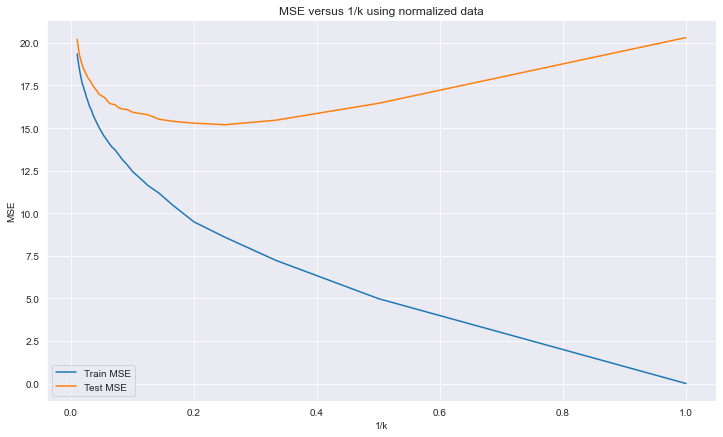

In [67]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(k_reverse, train_error, label="Train MSE")
axes.plot(k_reverse, test_error, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE versus 1/k using normalized data")
plt.show()

## J. Compare the results of KNN Regression with the linear regression model

In [68]:
pd.DataFrame(mse_dict, index=["train_mse", "test_mse"])

,all_predictor_LR,all_inter_LR,improved_LR,raw_KNN,normalized_KNN,standarized_KNN
train_mse,20.518696,17.871294,17.876250,9.421980,15.006301,8.592742
test_mse,21.357070,18.677607,18.693091,16.046084,17.625371,15.194752


For this dataset, KNN regressor seems to have a better performance according to the recorded MSE shown in table above. 

Importantly, there are two different methods to preprocess data for KNN regressor. We can see an improvement and the same optimal K when using standarization while normalized data even performs worse than rwa data one and gives a very different optimal K.